# **Momento de Retroalimentación: Módulo 2 Implementación de un modelo de deep learning.**

Daniel Flores Rodríguez - A01734184

In [101]:
# importamos las librerias mas usadas de python para poder trabajar la visualizacion de datos y la manipulacion
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
 

# Librerias relacionadas con la realizacion del modelo y la preparacion del dataset correspondiente
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Importamos ImageDataGenerator para el tratamiento de las imagenes que vamos a analizar.
from keras.preprocessing.image import ImageDataGenerator

# Configuración de la libreria matplotlib a "inline" y mostramos graficas debajo de la celda 
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#Librerias de deep learing
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical
from keras.utils import plot_model
from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
 

 #importamos tensorflow
import tensorflow as tf
import random as rn

# Manipulacion de imagenes en crudo y archivos comprimidos y de más.
import cv2                  
import numpy as np  
from tqdm import tqdm
import os                   
from random import shuffle  
from zipfile import ZipFile
from PIL import Image

In [102]:
#Montamos la direccion/directorio de donde se encuentran nuestras carpetas con las imagenes de los dinosaurios.
from google.colab import drive

drive.mount("/content/gdrive")
%cd "/content/gdrive/MyDrive/ITESM/Septimo Semestre/Implementación de un modelo de deep learning"

%ls

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/MyDrive/ITESM/Septimo Semestre/Implementación de un modelo de deep learning
 ankylosaurus/  'DinosaursOringinal (1).ipynb'      model_I.png    trex/
 brontosaurus/   DinosaursOringinalMejorado.ipynb   pterodactyl/   triceratops/


In [103]:
#realizamos un array con los nombres de nuestras clases/carpetas donde se encuentran las imagenes.

dinosaurs = ["ankylosaurus","brontosaurus","pterodactyl","trex","triceratops"]


In [104]:
# a continuacion se crean los arreglos / matrices en donde guardaremos valores relacionados con las imagenes.

# En la variable x se almacenara la imagen 'descompuesta' de tal manera que podemos trabajar con estas.
X = [] 

#Se almacenará el indice de las imagenes a manera de posicion y con el nombre de la clase (carpeta) de donde viene dicha/s imagen/es.
Z = []

# Definimos el tamaño de la imagen para poder trabajar y poderles hacer resize mas adelante.
img_size = 225

In [105]:
#definimos una funcion que nos ayuda a poder convertir la imagen en matriz y ademas creamos el indice de estas.

def train_test_img(especie, PD):
  for img in tqdm(os.listdir(PD)):
    nombre = especie
    path = os.path.join(PD, img) #obtenemos el path del archivo.
    img = cv2.imread(path, cv2.IMREAD_COLOR) #leemos la imagen
    img = cv2.resize(img, (img_size, img_size)) #reajustamos el tamaño de la imagen
    
    #se van agregando a los arreglos que se declararon anteriormente
    X.append(np.array(img))
    Z.append(str(nombre))

In [106]:
# en esta parte invocamos la funcion que acabamos de crear y le enviamos sus respectivos parametros.
for dino in dinosaurs:
  dir = './'+dino
  train_test_img(dino, dir)

100%|██████████| 40/40 [00:00<00:00, 91.21it/s]


In [107]:
#imprimimos X, para visualizar los resultados obtenidos
print(X)

[array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]

In [108]:
# Asi mismo imprimimos Z, para de igual manera, visualizar el resultado
print(Z)


['ankylosaurus', 'ankylosaurus', 'ankylosaurus', 'ankylosaurus', 'ankylosaurus', 'ankylosaurus', 'ankylosaurus', 'ankylosaurus', 'ankylosaurus', 'ankylosaurus', 'ankylosaurus', 'ankylosaurus', 'ankylosaurus', 'ankylosaurus', 'ankylosaurus', 'ankylosaurus', 'ankylosaurus', 'ankylosaurus', 'ankylosaurus', 'ankylosaurus', 'ankylosaurus', 'ankylosaurus', 'ankylosaurus', 'ankylosaurus', 'ankylosaurus', 'ankylosaurus', 'ankylosaurus', 'ankylosaurus', 'ankylosaurus', 'ankylosaurus', 'ankylosaurus', 'ankylosaurus', 'ankylosaurus', 'ankylosaurus', 'ankylosaurus', 'ankylosaurus', 'ankylosaurus', 'ankylosaurus', 'ankylosaurus', 'ankylosaurus', 'brontosaurus', 'brontosaurus', 'brontosaurus', 'brontosaurus', 'brontosaurus', 'brontosaurus', 'brontosaurus', 'brontosaurus', 'brontosaurus', 'brontosaurus', 'brontosaurus', 'brontosaurus', 'brontosaurus', 'brontosaurus', 'brontosaurus', 'brontosaurus', 'brontosaurus', 'brontosaurus', 'brontosaurus', 'brontosaurus', 'brontosaurus', 'brontosaurus', 'bronto

In [109]:

# Debuido a que queremos trabajar con la etiqueta (nombre de carpetas donde tenemos guardadas las imagenes)
# realizamos un Label encoder, que nos ayudara a trabajar con una cadena de texto "transformada"

label_encoder=LabelEncoder()
Y=label_encoder.fit_transform(Z)
Y=to_categorical(Y,5)
X=np.array(X)

#Finalmente y para no tener cantidades grandes de procesamiento, se realiza una division, de tal manera que los valores de las imagenes queden mas pequeños, pero con la misma escala
# la cantidad se debe al codigo de los colores rgb
X=X/255

In [110]:
# se realiza en split de los datos.
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.20,random_state=42)

In [111]:
# En este caso, definimos unos de los hiperparametros mas importantes para poder realizar CNN, las epocas y el tamaño del batch.
batch_size= 35
epochs=5

In [112]:
#limpiamos la sesion de keras
K.clear_session()


# Empezamos a armar nuestro modelo a traves de CNN.
# En este caso se probara con dos capas de 50 filtros, usando la funcion de activacion Relu.


modelo = Sequential()
modelo.add(Conv2D(filters = 50, kernel_size = (5,5), padding='Same',activation='relu', input_shape = (225,225,3)))
modelo.add(MaxPooling2D(pool_size=(2,2)))


modelo.add(Conv2D(filters = 50, kernel_size = (3,3), padding='Same',activation='relu'))
modelo.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

modelo.add(Flatten())
modelo.add(Dense(512))
modelo.add(Activation('relu'))
modelo.add(Dense(5, activation = "softmax"))

In [113]:

#posterior de haber armado o preparado nuestro modelo, podemos compilarlo como se muestra a continuacion

modelo.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [114]:
# Imprimimos un resumen del modelo a emplear
print(modelo.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 225, 225, 50)      3800      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 50)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 50)      22550     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 50)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 156800)            0         
                                                                 
 dense (Dense)               (None, 512)               8

In [115]:
# ya teniendo todo listo, se procede a entrenar el modelo, a traves de la funcion fit y las variables de test y train

Resultado = modelo.fit(x_train,y_train,epochs=epochs,batch_size=batch_size,validation_data = (x_test,y_test))

Epoch 1/5
5/5 [==============================] - 26s 5s/step - loss: 11.9550 - accuracy: 0.2188 - val_loss: 2.7654 - val_accuracy: 0.2500
Epoch 2/5
5/5 [==============================] - 24s 5s/step - loss: 1.8737 - accuracy: 0.2625 - val_loss: 1.4798 - val_accuracy: 0.3000
Epoch 3/5
5/5 [==============================] - 24s 5s/step - loss: 1.4042 - accuracy: 0.4750 - val_loss: 1.0520 - val_accuracy: 0.6250
Epoch 4/5
5/5 [==============================] - 24s 5s/step - loss: 1.1409 - accuracy: 0.5000 - val_loss: 2.1803 - val_accuracy: 0.3750
Epoch 5/5
5/5 [==============================] - 24s 5s/step - loss: 1.1942 - accuracy: 0.6250 - val_loss: 0.8581 - val_accuracy: 0.6000


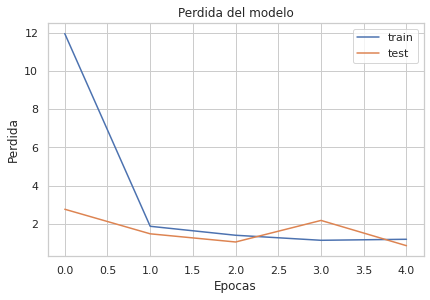

In [116]:

# Se procede a graficar los resultados obtenidos, en este caso se plotea una grafica de las perdidas del modelo.

plt.plot(Resultado.history['loss'])
plt.plot(Resultado.history['val_loss'])
plt.title('Perdida del modelo')
plt.ylabel('Perdida')
plt.xlabel('Epocas')
plt.legend(['train', 'test'])
plt.show()

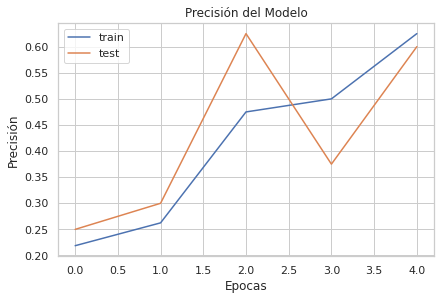

In [117]:

# De igual manera se plotea la grafica de precision del modelo

#En ella podemos notar un comportamiento aceptable y parecido.
plt.plot(Resultado.history['accuracy'])
plt.plot(Resultado.history['val_accuracy'])
plt.title('Precisión del Modelo')
plt.ylabel('Precisión')
plt.xlabel('Epocas')
plt.legend(['train', 'test'])
plt.show()

In [120]:
# Realizamos operaciones para poder calcular el error/perdida y la precision del modelo.

# podemos observar que el resultado de precision no es tan bueno que digamos, asi que se buscara otra manera para mejorar este modelo.
puntaje_modelo_1 = modelo.evaluate(x_test, y_test, verbose=0)
print('Test perdida de Modelo 1:', puntaje_modelo_1[0])
print('Test precision de Modelo 1:', puntaje_modelo_1[1])

Test perdida de Modelo 1: 0.8581182360649109
Test precision de Modelo 1: 0.6000000238418579


In [121]:
#Finalmente calculamos la matriz de confusion
matrix = confusion_matrix(y_test.argmax(axis = 1), modelo.predict(x_test).argmax(axis=1))
matrix

2/2 [==============================] - 2s 338ms/step


array([[5, 0, 0, 0, 0],
       [3, 8, 1, 0, 0],
       [6, 0, 0, 0, 0],
       [0, 1, 0, 9, 0],
       [5, 0, 0, 0, 2]])